In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=f1b82d7ad839f4eaa7916db709b57afc669e8c8f8dfe95eb48601fd4843b0c2d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.3MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pandas_datareader import data as web
import yfinance as yf
import pandas as pd
pd.set_option('display.max_columns', 10)

In [ ]:
def plot_chart(name):
    stock = name
    df = yf.download(tickers="ONGC.NS", 
                   period="2d", 
                   interval="5m")
    df.drop(df.index[[0]], inplace=True) 
    df['vwap'] = (df.Volume*(df.High+df.Low+df.Close)/3).cumsum() / df.Volume.cumsum()
    mc = mpf.make_marketcolors(up='#00675b',down='#d50000',edge='inherit',wick='inherit',volume='inherit')
    s  = mpf.make_mpf_style(marketcolors=mc,y_on_right=True,gridstyle='-')
    ema_short1 = df.Close.ewm(span=10, adjust=False).mean()
    ema_short2 = df.Close.ewm(span=50, adjust=False).mean()
    apdict = [mpf.make_addplot(df.vwap),mpf.make_addplot(ema_short1),mpf.make_addplot(ema_short2)]
    fig, axes = mpf.plot(df,title=name[:-3], type='candlestick',style=s,volume=True, no_xgaps = True,figratio=(38,25),datetime_format='%',figscale=1.5,addplot=apdict,returnfig=True)
    mav_titles=["Price","VWAP",'EMA2','EMA3']
    axes[0].legend(mav_titles)

[*********************100%***********************]  1 of 1 completed


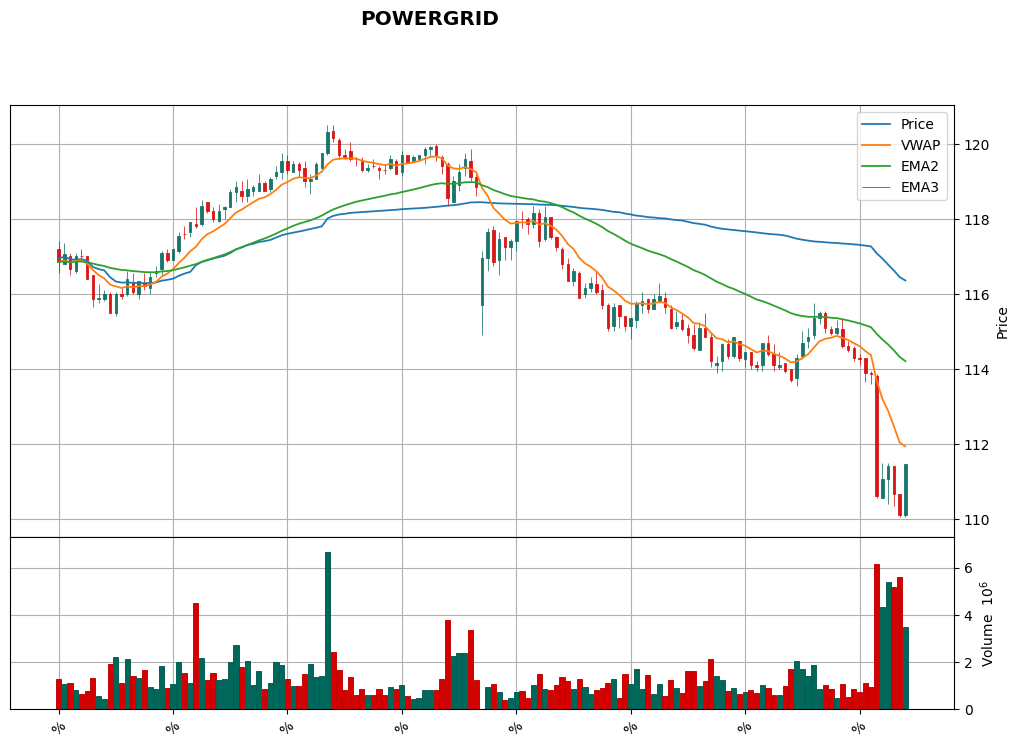

In [ ]:
plot_chart('POWERGRID.NS')